In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
df = pd.read_csv('E:/7.ai/movie_number/movies_train.csv')
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [69]:
x.shape, y.shape

((600, 11), (600,))

In [70]:
# 데이터 탐색
# 데이터 전처리 - 데이터 표준화, 피처 특성파악(중요피처 선택), 범주형 데이터 수치화
# 데이터 분할
# base model 선택  @
# 모델적용
# 모델 평가  평가결과에 따라서 @에 해당하는 모델재 선택
# 결과 도출

In [71]:
x = x.iloc[:,2:]
x

,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2
1,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3
2,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4
3,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6
4,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2
...,...,...,...,...,...,...,...,...,...
595,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.00,1,510,7
596,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.00,1,286,6
597,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4
598,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4


In [72]:
# 4
x = pd.concat( (x.iloc[:,:4], x.iloc[:,5:]),axis = 1)
x

,genre,release_time,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,액션,2012-11-22,96,청소년 관람불가,NaN,0,91,2
1,느와르,2015-11-19,130,청소년 관람불가,1161602.50,2,387,3
2,액션,2013-06-05,123,15세 관람가,220775.25,4,343,4
3,코미디,2012-07-12,101,전체 관람가,23894.00,2,20,6
4,코미디,2010-11-04,108,15세 관람가,1.00,1,251,2
...,...,...,...,...,...,...,...,...
595,드라마,2014-08-13,111,청소년 관람불가,3833.00,1,510,7
596,드라마,2013-03-14,127,15세 관람가,496061.00,1,286,6
597,공포,2010-09-30,99,청소년 관람불가,NaN,0,123,4
598,느와르,2015-05-14,102,15세 관람가,NaN,0,431,4


In [73]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genre           600 non-null    object 
 1   release_time    600 non-null    object 
 2   time            600 non-null    int64  
 3   screening_rat   600 non-null    object 
 4   dir_prev_bfnum  270 non-null    float64
 5   dir_prev_num    600 non-null    int64  
 6   num_staff       600 non-null    int64  
 7   num_actor       600 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 37.6+ KB


In [74]:
# title : 영화의 제목
# distributor : 배급사
# genre : 장르
# release_time : 개봉일
# time : 상영시간(분)
# screening_rat : 상영등급
# director : 감독이름
# dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
# dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
# num_staff : 스텝수
# num_actor : 주연배우수
# box_off_num : 관객수

In [75]:
x = pd.concat( (x.iloc[:,:1], x.iloc[:,2:]),axis = 1)
x

,genre,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,액션,96,청소년 관람불가,NaN,0,91,2
1,느와르,130,청소년 관람불가,1161602.50,2,387,3
2,액션,123,15세 관람가,220775.25,4,343,4
3,코미디,101,전체 관람가,23894.00,2,20,6
4,코미디,108,15세 관람가,1.00,1,251,2
...,...,...,...,...,...,...,...
595,드라마,111,청소년 관람불가,3833.00,1,510,7
596,드라마,127,15세 관람가,496061.00,1,286,6
597,공포,99,청소년 관람불가,NaN,0,123,4
598,느와르,102,15세 관람가,NaN,0,431,4


In [76]:
x.dir_prev_bfnum.fillna(0,inplace=True)

In [77]:
x.genre.unique()

array(['액션', '느와르', '코미디', '다큐멘터리', '뮤지컬', '드라마', '멜로/로맨스', '공포', '서스펜스',
       '애니메이션', '미스터리', 'SF'], dtype=object)

In [78]:
len(x.genre.unique())

12

In [79]:
list(range(len(x.genre.unique())))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [80]:
# 애초에 원핫
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
x.genre.onehot = ohe.fit_transform(np.array(x.genre).reshape(-1,1))

In [83]:
xtemp = x.genre.onehot.toarray()

In [87]:
pd.get_dummies(x.genre)

,SF,공포,느와르,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,서스펜스,애니메이션,액션,코미디
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,1,0,0,0,0,0,0,0
596,0,0,0,0,1,0,0,0,0,0,0,0
597,0,1,0,0,0,0,0,0,0,0,0,0
598,0,0,1,0,0,0,0,0,0,0,0,0


In [90]:
newdf = pd.concat( (pd.get_dummies(x.genre), x.iloc[:,1:]),axis=1)
newdf.head()

,SF,공포,느와르,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,서스펜스,애니메이션,액션,코미디,time,screening_rat,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,0,0,0,0,0,0,0,0,0,0,1,0,96,청소년 관람불가,0.00,0,91,2
1,0,0,1,0,0,0,0,0,0,0,0,0,130,청소년 관람불가,1161602.50,2,387,3
2,0,0,0,0,0,0,0,0,0,0,1,0,123,15세 관람가,220775.25,4,343,4
3,0,0,0,0,0,0,0,0,0,0,0,1,101,전체 관람가,23894.00,2,20,6
4,0,0,0,0,0,0,0,0,0,0,0,1,108,15세 관람가,1.00,1,251,2


In [ ]:
# 범주형 데이터 제외하고 수치형 -> 표준화
# 인코딩데이터와 결합

In [92]:
newx =  x.loc[:, ['time','dir_prev_bfnum','dir_prev_num','num_staff','num_actor'] ]
newx.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,96,0.00,0,91,2
1,130,1161602.50,2,387,3
2,123,220775.25,4,343,4
3,101,23894.00,2,20,6
4,108,1.00,1,251,2


In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
ss = StandardScaler()
newx = ss.fit_transform(newx)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [96]:
newx = pd.DataFrame(newx,columns=['time','dir_prev_bfnum','dir_prev_num','num_staff','num_actor'])
newx.head()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,-0.268953,-0.361285,-0.741416,-0.363216,-0.698066
1,1.611324,0.526530,0.950027,1.425124,-0.289043
2,1.224208,-0.192546,2.641471,1.159290,0.119980
3,0.007558,-0.343023,0.950027,-0.792176,0.938026
4,0.394674,-0.361284,0.104306,0.603454,-0.698066


In [97]:
newx2 = pd.concat( (pd.get_dummies(x.genre), newx),axis=1)
newx2.head()

,SF,공포,느와르,다큐멘터리,드라마,멜로/로맨스,뮤지컬,미스터리,서스펜스,애니메이션,액션,코미디,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,0,0,0,0,0,0,0,0,0,0,1,0,-0.268953,-0.361285,-0.741416,-0.363216,-0.698066
1,0,0,1,0,0,0,0,0,0,0,0,0,1.611324,0.526530,0.950027,1.425124,-0.289043
2,0,0,0,0,0,0,0,0,0,0,1,0,1.224208,-0.192546,2.641471,1.159290,0.119980
3,0,0,0,0,0,0,0,0,0,0,0,1,0.007558,-0.343023,0.950027,-0.792176,0.938026
4,0,0,0,0,0,0,0,0,0,0,0,1,0.394674,-0.361284,0.104306,0.603454,-0.698066


In [101]:
pd.get_dummies( df.screening_rat)
newx3 = pd.concat( (pd.get_dummies( df.screening_rat), newx2),axis=1)
newx3.head()

,12세 관람가,15세 관람가,전체 관람가,청소년 관람불가,SF,공포,느와르,다큐멘터리,드라마,멜로/로맨스,...,미스터리,서스펜스,애니메이션,액션,코미디,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,-0.268953,-0.361285,-0.741416,-0.363216,-0.698066
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1.611324,0.526530,0.950027,1.425124,-0.289043
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1.224208,-0.192546,2.641471,1.159290,0.119980
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0.007558,-0.343023,0.950027,-0.792176,0.938026
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0.394674,-0.361284,0.104306,0.603454,-0.698066


In [102]:
# 데이터 분할
from sklearn.model_selection import train_test_split

In [103]:
x_train,x_test,y_train,y_test = train_test_split(newx3,y,random_state=32)

In [104]:
# base model 
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train), lr.score(x_test,y_test)

(0.34589098533511065, 0.31771046741906306)

In [105]:
# 곡선  선형회귀 - 다차원
from sklearn.preprocessing import PolynomialFeatures
pf= PolynomialFeatures(degree=2)
x_train_poly =  pf.fit_transform(x_train)
x_test_poly =  pf.fit_transform(x_test)
lr.fit(x_train_poly,y_train)
lr.score(x_train_poly,y_train), lr.score(x_test_poly,y_test)

(0.619926731420168, -8.4780350056835e+20)

In [106]:
# 규제 들어갑니다. 
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [114]:
ridge = Ridge(alpha=300)
ridge.fit(x_train_poly,y_train)
ridge.score(x_train_poly,y_train), ridge.score(x_test_poly,y_test)

(0.4731282657932593, 0.2954054541613407)

In [118]:
ridge = Lasso(alpha=250)
ridge.fit(x_train_poly,y_train)
ridge.score(x_train_poly,y_train), ridge.score(x_test_poly,y_test)

C:\Users\user\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.115e+13, tolerance: 1.688e+11
  model = cd_fast.enet_coordinate_descent(


(0.6411352189656645, -0.36148644585501466)

In [127]:
ridge = ElasticNet(alpha=2)
ridge.fit(x_train_poly,y_train)
ridge.score(x_train_poly,y_train), ridge.score(x_test_poly,y_test)

(0.45071935078916636, 0.30995723535990527)

In [136]:
alphaList = range(2,500)
train_score, test_score = [],[]
for i in alphaList:
    etn = ElasticNet(alpha=i)
    etn.fit(x_train_poly,y_train)
    train_score.append(etn.score(x_train_poly,y_train))
    test_score.append(etn.score(x_test_poly,y_test))

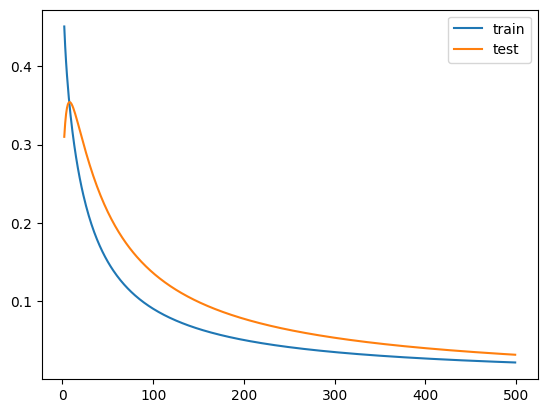

In [137]:
plt.plot(alphaList,train_score,label = 'train')
plt.plot(alphaList,test_score,label = 'test')
plt.legend()
plt.show()

In [138]:
np.argmax(test_score)

6

In [139]:
ridge = ElasticNet(alpha=7)
ridge.fit(x_train_poly,y_train)
ridge.score(x_train_poly,y_train), ridge.score(x_test_poly,y_test)

(0.3601181475250165, 0.35375172191304816)

In [140]:
# 랜덤포레스트
# 베깅 부스팅, 랜덤포레스트, xgboost

In [141]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
rfr = RandomForestRegressor(max_depth=2,n_estimators = 50)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train), rfr.score(x_test,y_test)

(0.4911599610030636, 0.36841573878496736)

In [159]:
# 머신러닝에서 하이퍼 파라메터를 조정해 주는 라이브러리 그리드서치CV
params = {
    'max_depth':[2,3],
    'n_estimators' : range(10,500,50)
}

In [160]:
from sklearn.model_selection import GridSearchCV

In [162]:
gsc = GridSearchCV(rfr, param_grid = params,verbose=2)
gsc.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=60; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=60; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=60; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=60; total time=   0.0s
[CV] END .......................max_depth=2, n_estimators=60; total time=   0.0s
[CV] END ......................max_depth=2, n_estimators=110; total time=   0.0s
[CV] END ......................max_depth=2, n_e

GridSearchCV(estimator=RandomForestRegressor(max_depth=2, n_estimators=50),
             param_grid={'max_depth': [2, 3],
                         'n_estimators': range(10, 500, 50)},
             verbose=2)

In [163]:
gsc.best_params_

{'max_depth': 3, 'n_estimators': 60}

In [164]:
gsc.best_score_

0.2755416176770438

In [165]:
bst_rf = gsc.best_estimator_
bst_rf.score(x_train,y_train), bst_rf.score(x_test,y_test)

(0.6254499002908172, 0.3581913616606175)

In [166]:
# 신경망을 이용한 학습

In [169]:
x_train.shape, y_train.shape

((450, 21), (450,))

In [170]:
# 신경망 설계
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout

In [172]:
x_train.shape[1]

21

In [174]:
model = tf.keras.models.Sequential()
model.add(Dense(64,activation='relu',input_shape=(21,) ) )
model.add(Dense(1))

In [176]:
model.compile(loss='mse',optimizer='adam', metrics='mae')

In [178]:
model.fit(x_train,y_train,epochs=1000)

Epoch 1/1000
15/15 [==============================] - 0s 5ms/step - loss: 4292734091264.0000 - mae: 736696.3750
Epoch 2/1000
15/15 [==============================] - 0s 4ms/step - loss: 4292733566976.0000 - mae: 736696.0625
Epoch 3/1000
15/15 [==============================] - 0s 4ms/step - loss: 4292732518400.0000 - mae: 736695.6875
Epoch 4/1000
15/15 [==============================] - 0s 5ms/step - loss: 4292731469824.0000 - mae: 736695.3125
Epoch 5/1000
15/15 [==============================] - 0s 4ms/step - loss: 4292730159104.0000 - mae: 736695.0625
Epoch 6/1000
15/15 [==============================] - 0s 4ms/step - loss: 4292728586240.0000 - mae: 736694.5000
Epoch 7/1000
15/15 [==============================] - 0s 4ms/step - loss: 4292727013376.0000 - mae: 736693.8750
Epoch 8/1000
15/15 [==============================] - 0s 4ms/step - loss: 4292725178368.0000 - mae: 736693.2500
Epoch 9/1000
15/15 [==============================] - 0s 4ms/step - loss: 4292723081216.0000 - mae: 7366

15/15 [==============================] - 0s 5ms/step - loss: 4292088430592.0000 - mae: 736507.7500
Epoch 74/1000
15/15 [==============================] - 0s 5ms/step - loss: 4292073488384.0000 - mae: 736503.3750
Epoch 75/1000
15/15 [==============================] - 0s 4ms/step - loss: 4292058546176.0000 - mae: 736498.9375
Epoch 76/1000
15/15 [==============================] - 0s 4ms/step - loss: 4292042817536.0000 - mae: 736494.5000
Epoch 77/1000
15/15 [==============================] - 0s 4ms/step - loss: 4292026826752.0000 - mae: 736490.0000
Epoch 78/1000
15/15 [==============================] - 0s 5ms/step - loss: 4292011884544.0000 - mae: 736485.5000
Epoch 79/1000
15/15 [==============================] - 0s 4ms/step - loss: 4291993796608.0000 - mae: 736480.5000
Epoch 80/1000
15/15 [==============================] - 0s 4ms/step - loss: 4291977543680.0000 - mae: 736475.5000
Epoch 81/1000
15/15 [==============================] - 0s 4ms/step - loss: 4291958669312.0000 - mae: 736469.81

15/15 [==============================] - 0s 5ms/step - loss: 4290302443520.0000 - mae: 736016.3750
Epoch 146/1000
15/15 [==============================] - 0s 4ms/step - loss: 4290272034816.0000 - mae: 736006.8125
Epoch 147/1000
15/15 [==============================] - 0s 4ms/step - loss: 4290232451072.0000 - mae: 735997.3125
Epoch 148/1000
15/15 [==============================] - 0s 4ms/step - loss: 4290196013056.0000 - mae: 735987.6250
Epoch 149/1000
15/15 [==============================] - 0s 5ms/step - loss: 4290157740032.0000 - mae: 735977.3750
Epoch 150/1000
15/15 [==============================] - 0s 4ms/step - loss: 4290119467008.0000 - mae: 735968.0625
Epoch 151/1000
15/15 [==============================] - 0s 4ms/step - loss: 4290083291136.0000 - mae: 735958.6875
Epoch 152/1000
15/15 [==============================] - 0s 5ms/step - loss: 4290046328832.0000 - mae: 735949.4375
Epoch 153/1000
15/15 [==============================] - 0s 4ms/step - loss: 4290010152960.0000 - mae: 7

Epoch 217/1000
15/15 [==============================] - 0s 4ms/step - loss: 4287246893056.0000 - mae: 735247.3750
Epoch 218/1000
15/15 [==============================] - 0s 5ms/step - loss: 4287204163584.0000 - mae: 735237.7500
Epoch 219/1000
15/15 [==============================] - 0s 5ms/step - loss: 4287166939136.0000 - mae: 735228.0000
Epoch 220/1000
15/15 [==============================] - 0s 5ms/step - loss: 4287123685376.0000 - mae: 735218.0625
Epoch 221/1000
15/15 [==============================] - 0s 5ms/step - loss: 4287082790912.0000 - mae: 735208.0625
Epoch 222/1000
15/15 [==============================] - 0s 5ms/step - loss: 4287041634304.0000 - mae: 735198.1250
Epoch 223/1000
15/15 [==============================] - 0s 5ms/step - loss: 4287003099136.0000 - mae: 735188.6250
Epoch 224/1000
15/15 [==============================] - 0s 5ms/step - loss: 4286962204672.0000 - mae: 735178.8750
Epoch 225/1000
15/15 [==============================] - 0s 5ms/step - loss: 428691868876

15/15 [==============================] - 0s 4ms/step - loss: 4283890663424.0000 - mae: 734485.3125
Epoch 289/1000
15/15 [==============================] - 0s 4ms/step - loss: 4283839807488.0000 - mae: 734474.4375
Epoch 290/1000
15/15 [==============================] - 0s 5ms/step - loss: 4283785805824.0000 - mae: 734462.7500
Epoch 291/1000
15/15 [==============================] - 0s 5ms/step - loss: 4283736260608.0000 - mae: 734451.6875
Epoch 292/1000
15/15 [==============================] - 0s 5ms/step - loss: 4283680686080.0000 - mae: 734440.1250
Epoch 293/1000
15/15 [==============================] - 0s 5ms/step - loss: 4283623014400.0000 - mae: 734427.6875
Epoch 294/1000
15/15 [==============================] - 0s 5ms/step - loss: 4283567702016.0000 - mae: 734416.0625
Epoch 295/1000
15/15 [==============================] - 0s 4ms/step - loss: 4283516321792.0000 - mae: 734404.5000
Epoch 296/1000
15/15 [==============================] - 0s 4ms/step - loss: 4283460485120.0000 - mae: 7

Epoch 360/1000
15/15 [==============================] - 0s 4ms/step - loss: 4279546675200.0000 - mae: 733573.6875
Epoch 361/1000
15/15 [==============================] - 0s 5ms/step - loss: 4279494770688.0000 - mae: 733562.8125
Epoch 362/1000
15/15 [==============================] - 0s 5ms/step - loss: 4279436574720.0000 - mae: 733550.2500
Epoch 363/1000
15/15 [==============================] - 0s 4ms/step - loss: 4279374446592.0000 - mae: 733536.8125
Epoch 364/1000
15/15 [==============================] - 0s 5ms/step - loss: 4279311794176.0000 - mae: 733525.5625
Epoch 365/1000
15/15 [==============================] - 0s 4ms/step - loss: 4279261462528.0000 - mae: 733514.4375
Epoch 366/1000
15/15 [==============================] - 0s 5ms/step - loss: 4279190683648.0000 - mae: 733498.8750
Epoch 367/1000
15/15 [==============================] - 0s 7ms/step - loss: 4279118331904.0000 - mae: 733485.3125
Epoch 368/1000
15/15 [==============================] - 0s 5ms/step - loss: 427905908736

15/15 [==============================] - 0s 4ms/step - loss: 4275084984320.0000 - mae: 732678.6875
Epoch 432/1000
15/15 [==============================] - 0s 5ms/step - loss: 4275007913984.0000 - mae: 732664.6875
Epoch 433/1000
15/15 [==============================] - 0s 5ms/step - loss: 4274942902272.0000 - mae: 732651.8125
Epoch 434/1000
15/15 [==============================] - 0s 5ms/step - loss: 4274853249024.0000 - mae: 732634.8125
Epoch 435/1000
15/15 [==============================] - 0s 5ms/step - loss: 4274774081536.0000 - mae: 732619.3125
Epoch 436/1000
15/15 [==============================] - 0s 4ms/step - loss: 4274699108352.0000 - mae: 732605.5000
Epoch 437/1000
15/15 [==============================] - 0s 4ms/step - loss: 4274634620928.0000 - mae: 732590.8750
Epoch 438/1000
15/15 [==============================] - 0s 4ms/step - loss: 4274558337024.0000 - mae: 732577.8750
Epoch 439/1000
15/15 [==============================] - 0s 5ms/step - loss: 4274492801024.0000 - mae: 7

Epoch 503/1000
15/15 [==============================] - 0s 4ms/step - loss: 4269734363136.0000 - mae: 731653.8750
Epoch 504/1000
15/15 [==============================] - 0s 4ms/step - loss: 4269661224960.0000 - mae: 731640.3125
Epoch 505/1000
15/15 [==============================] - 0s 5ms/step - loss: 4269589659648.0000 - mae: 731626.8125
Epoch 506/1000
15/15 [==============================] - 0s 4ms/step - loss: 4269513113600.0000 - mae: 731612.6875
Epoch 507/1000
15/15 [==============================] - 0s 5ms/step - loss: 4269436567552.0000 - mae: 731598.7500
Epoch 508/1000
15/15 [==============================] - 0s 4ms/step - loss: 4269366050816.0000 - mae: 731585.0625
Epoch 509/1000
15/15 [==============================] - 0s 5ms/step - loss: 4269289242624.0000 - mae: 731569.5000
Epoch 510/1000
15/15 [==============================] - 0s 4ms/step - loss: 4269212434432.0000 - mae: 731555.4375
Epoch 511/1000
15/15 [==============================] - 0s 5ms/step - loss: 426913090764

15/15 [==============================] - 0s 4ms/step - loss: 4263819870208.0000 - mae: 730571.2500
Epoch 575/1000
15/15 [==============================] - 0s 4ms/step - loss: 4263731265536.0000 - mae: 730556.3750
Epoch 576/1000
15/15 [==============================] - 0s 4ms/step - loss: 4263644233728.0000 - mae: 730541.2500
Epoch 577/1000
15/15 [==============================] - 0s 5ms/step - loss: 4263560347648.0000 - mae: 730525.7500
Epoch 578/1000
15/15 [==============================] - 0s 4ms/step - loss: 4263474102272.0000 - mae: 730511.1250
Epoch 579/1000
15/15 [==============================] - 0s 5ms/step - loss: 4263389954048.0000 - mae: 730496.3750
Epoch 580/1000
15/15 [==============================] - 0s 5ms/step - loss: 4263304495104.0000 - mae: 730481.5625
Epoch 581/1000
15/15 [==============================] - 0s 5ms/step - loss: 4263214317568.0000 - mae: 730465.3750
Epoch 582/1000
15/15 [==============================] - 0s 5ms/step - loss: 4263125450752.0000 - mae: 7

Epoch 646/1000
15/15 [==============================] - 0s 5ms/step - loss: 4256912637952.0000 - mae: 729400.3750
Epoch 647/1000
15/15 [==============================] - 0s 4ms/step - loss: 4256812236800.0000 - mae: 729384.6250
Epoch 648/1000
15/15 [==============================] - 0s 4ms/step - loss: 4256717340672.0000 - mae: 729368.2500
Epoch 649/1000
15/15 [==============================] - 0s 5ms/step - loss: 4256601997312.0000 - mae: 729350.5625
Epoch 650/1000
15/15 [==============================] - 0s 5ms/step - loss: 4256495304704.0000 - mae: 729331.5000
Epoch 651/1000
15/15 [==============================] - 0s 5ms/step - loss: 4256394903552.0000 - mae: 729314.6250
Epoch 652/1000
15/15 [==============================] - 0s 5ms/step - loss: 4256294502400.0000 - mae: 729298.2500
Epoch 653/1000
15/15 [==============================] - 0s 4ms/step - loss: 4256197771264.0000 - mae: 729282.0625
Epoch 654/1000
15/15 [==============================] - 0s 5ms/step - loss: 425609605939

15/15 [==============================] - 0s 6ms/step - loss: 4249324355584.0000 - mae: 728154.6250
Epoch 718/1000
15/15 [==============================] - 0s 4ms/step - loss: 4249214255104.0000 - mae: 728137.3750
Epoch 719/1000
15/15 [==============================] - 0s 4ms/step - loss: 4249109397504.0000 - mae: 728120.3125
Epoch 720/1000
15/15 [==============================] - 0s 4ms/step - loss: 4248986189824.0000 - mae: 728100.1875
Epoch 721/1000
15/15 [==============================] - 0s 4ms/step - loss: 4248867438592.0000 - mae: 728081.2500
Epoch 722/1000
15/15 [==============================] - 0s 4ms/step - loss: 4248760483840.0000 - mae: 728063.0000
Epoch 723/1000
15/15 [==============================] - 0s 4ms/step - loss: 4248645140480.0000 - mae: 728045.5000
Epoch 724/1000
15/15 [==============================] - 0s 4ms/step - loss: 4248534253568.0000 - mae: 728026.7500
Epoch 725/1000
15/15 [==============================] - 0s 4ms/step - loss: 4248400035840.0000 - mae: 7

Epoch 789/1000
15/15 [==============================] - 0s 4ms/step - loss: 4240748052480.0000 - mae: 726795.4375
Epoch 790/1000
15/15 [==============================] - 0s 4ms/step - loss: 4240649486336.0000 - mae: 726777.8750
Epoch 791/1000
15/15 [==============================] - 0s 4ms/step - loss: 4240531783680.0000 - mae: 726760.1875
Epoch 792/1000
15/15 [==============================] - 0s 4ms/step - loss: 4240416702464.0000 - mae: 726743.9375
Epoch 793/1000
15/15 [==============================] - 0s 5ms/step - loss: 4240310272000.0000 - mae: 726727.7500
Epoch 794/1000
15/15 [==============================] - 0s 4ms/step - loss: 4240199385088.0000 - mae: 726710.3125
Epoch 795/1000
15/15 [==============================] - 0s 4ms/step - loss: 4240089546752.0000 - mae: 726693.1875
Epoch 796/1000
15/15 [==============================] - 0s 4ms/step - loss: 4239984427008.0000 - mae: 726676.6250
Epoch 797/1000
15/15 [==============================] - 0s 4ms/step - loss: 423986724864

15/15 [==============================] - 0s 4ms/step - loss: 4232350531584.0000 - mae: 725519.3750
Epoch 861/1000
15/15 [==============================] - 0s 5ms/step - loss: 4232239906816.0000 - mae: 725503.4375
Epoch 862/1000
15/15 [==============================] - 0s 4ms/step - loss: 4232126136320.0000 - mae: 725486.0000
Epoch 863/1000
15/15 [==============================] - 0s 4ms/step - loss: 4232017346560.0000 - mae: 725469.7500
Epoch 864/1000
15/15 [==============================] - 0s 4ms/step - loss: 4231909081088.0000 - mae: 725453.0000
Epoch 865/1000
15/15 [==============================] - 0s 4ms/step - loss: 4231791902720.0000 - mae: 725435.0000
Epoch 866/1000
15/15 [==============================] - 0s 3ms/step - loss: 4231666597888.0000 - mae: 725416.9375
Epoch 867/1000
15/15 [==============================] - 0s 4ms/step - loss: 4231498039296.0000 - mae: 725391.6875
Epoch 868/1000
15/15 [==============================] - 0s 3ms/step - loss: 4231348879360.0000 - mae: 7

Epoch 932/1000
15/15 [==============================] - 0s 5ms/step - loss: 4223595446272.0000 - mae: 724206.5000
Epoch 933/1000
15/15 [==============================] - 0s 5ms/step - loss: 4223466209280.0000 - mae: 724187.5000
Epoch 934/1000
15/15 [==============================] - 0s 5ms/step - loss: 4223352963072.0000 - mae: 724170.0000
Epoch 935/1000
15/15 [==============================] - 0s 4ms/step - loss: 4223219269632.0000 - mae: 724152.1250
Epoch 936/1000
15/15 [==============================] - 0s 5ms/step - loss: 4223093178368.0000 - mae: 724133.2500
Epoch 937/1000
15/15 [==============================] - 0s 5ms/step - loss: 4222913871872.0000 - mae: 724106.6875
Epoch 938/1000
15/15 [==============================] - 0s 4ms/step - loss: 4222759993344.0000 - mae: 724082.0000
Epoch 939/1000
15/15 [==============================] - 0s 5ms/step - loss: 4222612930560.0000 - mae: 724062.3125
Epoch 940/1000
15/15 [==============================] - 0s 5ms/step - loss: 422245747916